In [272]:
import sys
sys.path.append('../src/')

import torch
import torch.nn as nn
import torch.utils.data as data
import torchvision.transforms as transforms
from torchvision.transforms import ToTensor
import PIL
from PIL import Image
import os
import os.path
import numpy as np
import sys
from copy import copy
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt


import torchvision.transforms as transforms
from augments import RandomErasing


from data_loader import get_data_loader, imshow, pil_loader
from parameter import get_parameters
import torchvision.transforms as transforms

In [48]:
args = get_parameters()
args.data_dir = '/Users/daichi/Downloads/ifood'
args.batch_size = 1
# train_loader, val_loader, test_loader, test_dset = get_data_loader(args)

In [234]:
val_tform = transforms.Compose([
                                    transforms.Resize(args.image_min_size),
#                                     transforms.TenCrop(args.nw_input_size),
#                                     transforms.Lambda(lambda crops: crops[np.random.randint(len(crops))]),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=args.pretrain_dset_mean,
                                                         std=args.pretrain_dset_std)
                                   ])

class FoodDatasetTest(data.Dataset):
        def __init__(self, root, csv_path, num_labels=250, transform=None, target_transform=None, test=False):
            self.root = root
            self.img_name = sorted(glob('{}/*.jpg'.format(root)))
            self.num_labels = num_labels
            self.transform = transform

        def __getitem__(self, index):
            img = self.img_name[index]
            print(img)
            # Make img
            img = pil_loader(img)
            img = self.transform(img)
            
            return img

        def __len__(self):
            return len(self.img_name)
test_dset = FoodDatasetTest(args.test_dir, None, args.num_labels, transform=val_tform, test=True)

In [235]:
import random
input = test_dset.__getitem__(11)
print(input.size())

/Users/daichi/Downloads/ifood/test_set/test_000011.jpg
torch.Size([3, 498, 663])


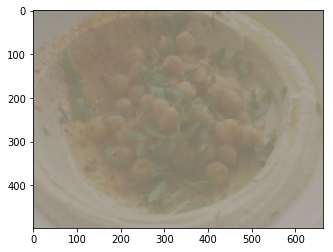

In [237]:
tform = transforms.Compose([transforms.Resize(args.image_min_size)])

imshow(input)

In [238]:
input = transforms.Resize(args.image_min_size)

## 340

In [247]:
img = pil_loader('/Users/daichi/Downloads/ifood/test_set/test_000918.jpg')
resize_340 = transforms.Compose([transforms.Resize(340)])
img_aug = resize_340(img)

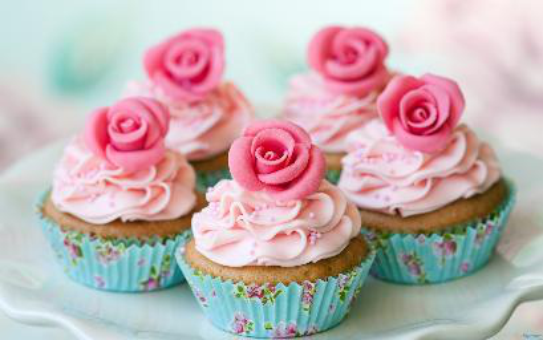

In [249]:
img_aug

In [294]:
# https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.TenCrop

norm = transforms.Compose([
                                    transforms.Normalize(mean=args.pretrain_dset_mean,std=args.pretrain_dset_std)
                                    ])

ten_crop = val_tform = transforms.Compose([
                                    transforms.Resize(340),
                                    transforms.TenCrop(320), # this is a list of PIL Images
                                    transforms.Lambda(lambda crops: torch.stack([norm(transforms.ToTensor()(crop)) for crop in crops])), 
])
img = pil_loader('/Users/daichi/Downloads/ifood/test_set/test_000918.jpg')
img_aug = ten_crop(img)

In [295]:
img_aug.size()

torch.Size([10, 3, 320, 320])